# Left Join

Inner join returns only the rows of data with matching values in the key columns of both tables.

Left Join returns all rows of data from the left table and only those rows from the right table where key columns match.

In [16]:
import pickle

#Import movies data
fileName = 'movies.p'
infile = open(fileName, 'rb')
movies = pickle.load(infile)
infile.close()

#Import casts data
fileName = 'casts.p'
infile = open(fileName, 'rb')
casts = pickle.load(infile)
infile.close()

#Import movie_to_genres data
fileName = 'movie_to_genres.p'
infile = open(fileName, 'rb')
movie_to_genres = pickle.load(infile)
infile.close()

#Import ratings data
fileName = 'ratings.p'
infile = open(fileName, 'rb')
ratings = pickle.load(infile)
infile.close()

#Import sequels data
fileName = 'sequels.p'
infile = open(fileName, 'rb')
sequels = pickle.load(infile)
infile.close()

#Import taglines data
fileName = 'taglines.p'
infile = open(fileName, 'rb')
taglines = pickle.load(infile)
infile.close()

#Import financials data
fileName = 'financials.p'
infile = open(fileName, 'rb')
financials = pickle.load(infile)
infile.close()

#Import crews data
fileName = 'crews.p'
infile = open(fileName, 'rb')
crews = pickle.load(infile)
infile.close()

In [17]:
movies_taglines = movies.merge(taglines, on='id', how='left')
print(movies_taglines.head())
print(movies_taglines.shape)

      id                 title  popularity release_date  \
0    257          Oliver Twist   20.415572   2005-09-23   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12   
2  38365             Grown Ups   38.864027   2010-06-24   
3   9672              Infamous    3.680896   2006-11-16   
4  12819       Alpha and Omega   12.300789   2010-09-17   

                                           tagline  
0                                              NaN  
1             Never underestimate an overachiever.  
2  Boys will be boys. . . some longer than others.  
3          There's more to the story than you know  
4                           A Pawsome 3D Adventure  
(4803, 5)


## Counting missing rows with left join
The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database.  
 This includes financial data, such as movie budget and revenue.  
  If you wanted to know which movies are still missing data, you could use a left join to identify them.  
   Practice using a left join by merging the movies table and the financials table.  

The movies and financials tables have been loaded for you.  

What column is likely the best column to merge the two tables on? id

Merge the movies table, as the left table, with the financials table using a left join, and save the result to movies_financials.  

Count the number of rows in movies_financials with a null value in the budget column.  

In [18]:
print(movies.dtypes)
print(financials.dtypes)

# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

id                int64
title            object
popularity      float64
release_date     object
dtype: object
id           int64
budget       int64
revenue    float64
dtype: object
1574


## Enriching a dataset
Setting how='left' with the .merge()method is a useful technique for enriching or enhancing a dataset with additional information from a different table.  
In this exercise, you will start off with a sample of movie data from the movie series Toy Story.  
Your goal is to enrich this data by adding the marketing tag line for each movie.  
You will compare the results of a left join versus an inner join.  

The toy_story DataFrame contains the Toy Story movies. The toy_story and taglines DataFrames have been loaded for you.  

Merge toy_story and taglines on the id column with a left join, and save the result as toystory_tag.  

With toy_story as the left table, merge to it taglines on the id column with an inner join, and save as toystory_tag  

In [19]:
import pandas as pd

toy_story = pd.read_csv("toy_story.txt", sep = "\t")

In [20]:
toystory_tag = toy_story.merge(taglines, on = 'id', how = 'left')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418    6/16/2010  No toy gets left behind.
1    863  Toy Story 2   73.575118   10/30/1999        The toys are back!
2    862    Toy Story   73.640445   10/30/1995                       NaN
(3, 5)


In [21]:
toystory_tag = toy_story.merge(taglines, on = 'id', how = 'inner')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418    6/16/2010  No toy gets left behind.
1    863  Toy Story 2   73.575118   10/30/1999        The toys are back!
(2, 5)


## How many rows with a left join?
Select the true statement about left joins.  

Try running the following code statements in the console.  

left_table.merge(one_to_one, on='id', how='left').shape  
left_table.merge(one_to_many, on='id', how='left').shape  
Note that the left_table starts out with 4 rows.  


# Right Join

Right joins return all of the rows from the right table and includes only those rows from the left table that have matching values. It is the mirror opposite of the left join.  

tv_movies = movies.merge(tv_genre, how='right',left_on='id', right_on='movie_id')  

Set the **how** argument to right so that the merge performs a right join.  
Additionally, set **left_on** and **right_on** which tell the merge which key columns from each table to merge the tables.  
With movies as the left table, set left_on to id and right_on to movie_id.   
Our returned table has movies that match our table of tv_genres.  

## Right join to find unique movies
Most of the recent big-budget science fiction movies can also be classified as action movies.  
You are given a table of science fiction movies called scifi_movies and another table of action movies called action_movies.  
Your goal is to find which movies are considered only science fiction movies.  
Once you have this table, you can merge the movies table in to see the movie names.  
Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.  

The movies, scifi_movies, and action_movies tables have been loaded for you.  

Merge action_movies and scifi_movies tables with a right join on movie_id. Save the result as action_scifi.  

Update the merge to add suffixes, where '_act' and '_sci' are suffixes for the left and right tables, respectively.  

From action_scifi, subset only the rows where the genre_act column is null.  

Merge movies and scifi_only using the id column in the left table and the movie_id column in the right table with an inner join.  

In [22]:
movies_with_genres = movies.merge(movie_to_genres, left_on = 'id', right_on = 'movie_id', how = 'left')
scifi_movies = movies_with_genres[movies_with_genres['genre'] == 'Science Fiction']
action_movies = movies_with_genres[movies_with_genres['genre'] == 'Action']

In [23]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, how = 'right', on = 'movie_id')

# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes = ['_act','_sci'])

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on = 'id',right_on = 'movie_id', how = 'inner')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

    id_act          title_act  popularity_act release_date_act  movie_id  \
0  49529.0        John Carter       43.926995       2012-03-07   49529.0   
1      NaN                NaN             NaN              NaN   18841.0   
2  76757.0  Jupiter Ascending       85.369080       2015-02-04   76757.0   
3      NaN                NaN             NaN              NaN   26672.0   
4      NaN                NaN             NaN              NaN   15301.0   

  genre_act  id_sci                     title_sci  popularity_sci  \
0    Action   49529                   John Carter       43.926995   
1       NaN   18841  The Lost Skeleton of Cadavra        1.680525   
2    Action   76757             Jupiter Ascending       85.369080   
3       NaN   26672     The Thief and the Cobbler        2.439184   
4       NaN   15301      Twilight Zone: The Movie       12.902975   

  release_date_sci        genre_sci  
0       2012-03-07  Science Fiction  
1       2001-09-12  Science Fiction  
2       2015-0

## Popular genres with right join
What are the genres of the most popular movies?  
To answer this question, you need to merge data from the movies and movie_to_genres tables.  
In a table called pop_movies, the top 10 most popular movies in the movies table have been selected.  
To ensure that you are analyzing all of the popular movies, merge it with the movie_to_genres table using a right join.  
To complete your analysis, count the number of different genres.  
Also, the two tables can be merged by the movie ID.   
However, in pop_movies that column is called id, and in movies_to_genres it's called movie_id.  
  
The pop_movies and movie_to_genres tables have been loaded for you.  

Merge movie_to_genres and pop_movies using a right join. Save the results as genres_movies.  
Group genres_movies by genre and count the number of id values.  

In [24]:
movies_sort_popularity = movies.sort_values(by = 'popularity', ascending = False)
pop_movies = movies_sort_popularity[:9]
print(pop_movies)
print(movie_to_genres[0:5])


          id                                              title  popularity  \
4546  211672                                            Minions  875.581305   
4343  157336                                       Interstellar  724.247784   
1966  293660                                           Deadpool  514.569956   
2423  118340                            Guardians of the Galaxy  481.098624   
4220   76341                                 Mad Max: Fury Road  434.278564   
1867  135397                                     Jurassic World  418.708552   
4375      22  Pirates of the Caribbean: The Curse of the Bla...  271.972889   
1106  119450                     Dawn of the Planet of the Apes  243.791743   
4216  131631              The Hunger Games: Mockingjay - Part 1  206.227151   

     release_date  
4546   2015-06-17  
4343   2014-11-05  
1966   2016-02-09  
2423   2014-07-30  
4220   2015-05-13  
1867   2015-06-09  
4375   2003-07-09  
1106   2014-06-26  
4216   2014-11-18  
   movie_

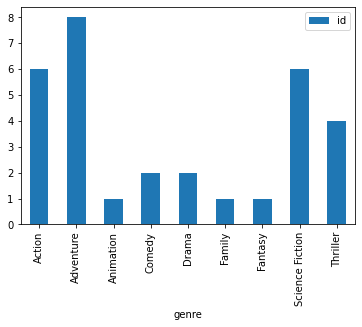

In [25]:
from matplotlib import pyplot as plt
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how = 'right', left_on = 'movie_id', right_on = 'id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

# Outer Join

Outer joins  return all of the rows from both tables regardless if there is a match between the tables.

how='outer'

## Using outer join to select actors
One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table.  
To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2.  
Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.  

The Iron Man 1 table is called iron_1_actors, and Iron Man 2 table is called iron_2_actors. Both tables have been loaded for you and a few rows printed so you can see the structure. 

In [26]:
#ONCE AGAIN DATACAMP FAILS TO SHARE THE DATA IN A USEFUIL WAY SO ALL OF THE BELOW CODE WILL FAIL UNLESS YOU FEEL LIKE PLAYING AROUND WITH THE IRON DATASETS I PULLED.
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     on = 'id',
                                     how = 'outer',
                                     suffixes=['_1', '_2'])

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

NameError: name 'iron_1_actors' is not defined

# Self join
Merging a table to itself can be useful when you want to compare values in a column to other values in the same column.  
In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row.  
You have been given a table called crews, which has columns id, job, and name.  
First, merge the table to itself using the movie ID.  
This merge will give you a larger table where for each movie, every job is matched against each other.  
Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables.  
This filtering will remove job combinations that aren't with the director.

The crews table has been loaded for you.

To a variable called crews_self_merged, merge the crews table to itself on the id column using an inner join, setting the suffixes to '_dir' and '_crew' for the left and right tables respectively.  
Create a Boolean index, named boolean_filter, that selects rows from the left table with the job of 'Director' and avoids rows with the job of 'Director' in the right table." 
Use the .head() method to print the first few rows of direct_crews. 

In [27]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner', suffixes=('_dir','_crew'))

# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & (crews_self_merged['job_crew'] != 'Director'))  

direct_crews = crews_self_merged[boolean_filter]  

direct_crews.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


# Merging on Indexes

DataFrame indexes are given a unique id that we can use when merging two tables together.  

## MultiIndex merge
In this merge, we pass in a list of index level names to the 'on' argument, just like we did when merging on multiple columns.  
Since this is an inner join, both the movie_id and cast_id must match in each table to be returned in the result.  
  
If the index level names are different between the two tables that we want to merge, then we can use the left_on and right_on arguments of the merge method.   

samuel_casts = samuel.merge(casts, on=['movie_id','cast_id'])

## Index merge for movie ratings
To practice merging on indexes, you will merge movies and a table called ratings that holds info about movie ratings.  
Make sure your merge returns all of the rows from the movies table and not all the rows of ratings table need to be included in the result.  

The movies and ratings tables have been loaded for you.  

Merge movies and ratings on the index and save to a variable called movies_ratings, ensuring that all of the rows from the movies table are returned.

## Index Merge with left_on and right_on

When merging on indexes, set left_index and right_index to True.  
These arguments take only True or False.  
Whenever the left_on or right_on arguments are used with an index, set the respective left_index and right_index arguments to True.  
The left_index and right_index tell the merge method to use the separate indexes.

movies_genres = movies.merge(movie_to_genres, left_on='id, left_index=True,right_on='movie_id', right_index=True)

In [28]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on = 'id', how = 'left')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist   20.415572   2005-09-23           6.7   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


## Do sequels earn more?
It is time to put together many of the aspects that you have learned in this chapter.  
In this exercise, you'll find out which movie sequels earned the most compared to the original movie.  
To answer this question, you will merge a modified version of the sequels and financials tables where their index is the movie ID.  
You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result.  
From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel.  
Next, you will calculate the difference between the two revenues and sort the resulting dataset.  

The sequels and financials tables have been provided.  

With the sequels table on the left, merge to it the financials table on index named id, ensuring that all the rows from the sequels are returned and some rows from the other table may not be returned, Save the results to sequels_fin.  

Merge the sequels_fin table to itself with an inner join, where the left and right tables merge on sequel and id respectively with suffixes equal to ('_org','_seq'), saving to orig_seq.  

Select the title_org, title_seq, and diff columns of orig_seq and save this as titles_diff.  

Sort by titles_diff by diff in descending order and print the first few rows.  

In [40]:
# This works fine on Datacamp, so there must be something about the pickle file that
# causes an issue. Feel free to troubleshoot if you want to and have extra time in your life.
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', 
                             left_on='sequel',
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values('diff', ascending = False).head())

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NAType'